# Hypothesis

In this investigation, I aim to explore the hypothesis that the brains of "creatives" and "logicians" function differently in specific ways. Common stereotypes suggest that creatives are better at distinguishing colors, recognizing faces, and perceiving things more holistically, with a focus on creative elements like colors. On the other hand, logicians are thought to approach problems step-by-step, yet they can also perceive systems as a whole, making them more adept at solving riddles.

Additionally, certain studies have shown that color preferences can be linked to emotional and cognitive patterns, so I wanted to see if 'artists' and 'logicians' different cognitive patterns will manifest as different colour preferences. 

I do realise creative technologists are probably the worst group of people to be testing this on. Oh Well.

Some research references:
https://psychology.cornell.edu/news/color-preference-impacts-perception  - how colour preferences impacts perception
https://pmc.ncbi.nlm.nih.gov/articles/PMC4383146/ - colour psychology


# Imports

In [1]:
 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/proud_questions.csv')
df.head()


,Timestamp,What did you like learning the most so far?,"In the picture above, are the 2 dots different colours?",Which country did you grow up in?,Which environment did you grow up in?,What's your favourite colour,Rate how much the picture above looks like a face - Building,Rate how much the picture above looks like a face -dots,How much does the picture above looks like a face? - cloud,How much does the picture above looks like a face? - (leaf),"It is greater than God and more evil than the devil. The poor have it, the rich need it, and if u eat it, you'll die. What is it?","Go to the store and get a loaf of bread. If they have eggs, get a dozen. What do you come back with?",Unnamed: 12
0,2024/10/17 4:46:25 PM GMT+1,Future Machines,Yes,UK,Countryside,Black,5,3,3,1,Absolutely Nothing,12 eggs,NaN
1,2024/10/17 4:52:14 PM GMT+1,Python,Yes,China,Suburb,Blue,5,4,4,1,Air?,12 eggs,NaN
2,2024/10/17 4:52:44 PM GMT+1,Unreal - World Making,Yes,uk,Suburb,Green,4,2,1,1,idk,bananas,NaN
3,2024/10/17 4:53:09 PM GMT+1,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas,NaN
4,2024/10/17 4:53:15 PM GMT+1,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs,NaN


# Data Exploration

In [3]:
print(f"Dataframe has {df.shape[1]} columns, {df.shape[0]} rows")
print(df.columns)

Dataframe has 13 columns, 17 rows
Index(['Timestamp', 'What did you like learning the most so far?',
       'In the picture above, are the 2 dots different colours?',
       'Which country did you grow up in?',
       'Which environment did you grow up in?', 'What's your favourite colour',
       'Rate how much the picture above looks like a face - Building',
       'Rate how much the picture above looks like a face -dots',
       'How much does the picture above looks like a face? - cloud',
       'How much does the picture above looks like a face? - (leaf)',
       'It is greater than God and more evil than the devil. The poor have it, the rich need it, and if u eat it, you'll die. What is it?',
       ' Go to the store and get a loaf of bread. If they have eggs, get a dozen.  What do you come back with?',
       'Unnamed: 12'],
      dtype='object')


# Data Cleaning

In [4]:
df.drop(columns=['Timestamp','Unnamed: 12'], inplace=True)
df.head()

,What did you like learning the most so far?,"In the picture above, are the 2 dots different colours?",Which country did you grow up in?,Which environment did you grow up in?,What's your favourite colour,Rate how much the picture above looks like a face - Building,Rate how much the picture above looks like a face -dots,How much does the picture above looks like a face? - cloud,How much does the picture above looks like a face? - (leaf),"It is greater than God and more evil than the devil. The poor have it, the rich need it, and if u eat it, you'll die. What is it?","Go to the store and get a loaf of bread. If they have eggs, get a dozen. What do you come back with?"
0,Future Machines,Yes,UK,Countryside,Black,5,3,3,1,Absolutely Nothing,12 eggs
1,Python,Yes,China,Suburb,Blue,5,4,4,1,Air?,12 eggs
2,Unreal - World Making,Yes,uk,Suburb,Green,4,2,1,1,idk,bananas
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs


In [5]:
# renaming columns
column_names = list(df.columns)
new_column_names = ['favourite_learning','different_colours','country_grow','environment_grow','favourite_colour','rate_face_building','rate_face_dots','rate_face_cloud','rate_face_leaf','nothing_riddle_text','eggs_riddle_choice']
rename_cols = dict(zip(column_names,new_column_names))
print(rename_cols)
df.rename(columns=rename_cols , inplace=True)
df.head()

{'What did you like learning the most so far?': 'favourite_learning', 'In the picture above, are the 2 dots different colours?': 'different_colours', 'Which country did you grow up in?': 'country_grow', 'Which environment did you grow up in?': 'environment_grow', "What's your favourite colour": 'favourite_colour', 'Rate how much the picture above looks like a face - Building': 'rate_face_building', 'Rate how much the picture above looks like a face -dots': 'rate_face_dots', 'How much does the picture above looks like a face? - cloud': 'rate_face_cloud', 'How much does the picture above looks like a face? - (leaf)': 'rate_face_leaf', "It is greater than God and more evil than the devil. The poor have it, the rich need it, and if u eat it, you'll die. What is it?": 'nothing_riddle_text', ' Go to the store and get a loaf of bread. If they have eggs, get a dozen.  What do you come back with?': 'eggs_riddle_choice'}


,favourite_learning,different_colours,country_grow,environment_grow,favourite_colour,rate_face_building,rate_face_dots,rate_face_cloud,rate_face_leaf,nothing_riddle_text,eggs_riddle_choice
0,Future Machines,Yes,UK,Countryside,Black,5,3,3,1,Absolutely Nothing,12 eggs
1,Python,Yes,China,Suburb,Blue,5,4,4,1,Air?,12 eggs
2,Unreal - World Making,Yes,uk,Suburb,Green,4,2,1,1,idk,bananas
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs


In [6]:
# Adding columns converting favourite learning module to scale rank from artistic to logic - Artistic (1) to logic (4)
df['favourite_learning'].value_counts()
rank_list = ['Unreal - World Making','Future Machines','Unreal - Blueprints','Python']
df['rank_art_to_logic'] = df['favourite_learning'].map(lambda x: rank_list.index(x) if x in rank_list else None)
df.head()

,favourite_learning,different_colours,country_grow,environment_grow,favourite_colour,rate_face_building,rate_face_dots,rate_face_cloud,rate_face_leaf,nothing_riddle_text,eggs_riddle_choice,rank_art_to_logic
0,Future Machines,Yes,UK,Countryside,Black,5,3,3,1,Absolutely Nothing,12 eggs,1
1,Python,Yes,China,Suburb,Blue,5,4,4,1,Air?,12 eggs,3
2,Unreal - World Making,Yes,uk,Suburb,Green,4,2,1,1,idk,bananas,0
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas,0
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs,0


In [7]:
# Cleaning country column
def clean_country(x):
    y= x.lower()
    if ('england' in y) or ('london' in y):
        y = 'uk'
    
    return y

# Lowercase everything
df['country_grow_clean'] = df.country_grow.apply(lambda x: clean_country(x))
# change all london / england to uk
df.head()

,favourite_learning,different_colours,country_grow,environment_grow,favourite_colour,rate_face_building,rate_face_dots,rate_face_cloud,rate_face_leaf,nothing_riddle_text,eggs_riddle_choice,rank_art_to_logic,country_grow_clean
0,Future Machines,Yes,UK,Countryside,Black,5,3,3,1,Absolutely Nothing,12 eggs,1,uk
1,Python,Yes,China,Suburb,Blue,5,4,4,1,Air?,12 eggs,3,china
2,Unreal - World Making,Yes,uk,Suburb,Green,4,2,1,1,idk,bananas,0,uk
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas,0,china
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs,0,uk


In [8]:
df.favourite_colour

0                Black
1                 Blue
2                Green
3               purple
4             hot pink
5                black
6                 Blue
7               Purple
8               Orange
9                Black
10                 Red
11                Blue
12               Blue 
13          all colors
14              Yellow
15    Dark Light Black
16               Black
Name: favourite_colour, dtype: object

In [9]:
# cleaning colour columns - categorising into warm/cold/monochrome/none 

def categorise_colours(colour):
    warm_colours = ['red','yellow','orange','pink','hot pink']
    cold_colours = ['blue','purple','green']
    monochrome = ['black','white']

    if colour in warm_colours:
        return 'warm'
    elif colour in cold_colours:
        return 'cold'
    elif colour in monochrome:
        return 'monochrome'
    else:
        return None

# lower case
df.favourite_colour = df.favourite_colour.apply(lambda x: x.lower().strip())

# assign colour preferences to groups
df['favourite_colour_category_clean'] = df.favourite_colour.apply(lambda x: categorise_colours(x))
df


,favourite_learning,different_colours,country_grow,environment_grow,favourite_colour,rate_face_building,rate_face_dots,rate_face_cloud,rate_face_leaf,nothing_riddle_text,eggs_riddle_choice,rank_art_to_logic,country_grow_clean,favourite_colour_category_clean
0,Future Machines,Yes,UK,Countryside,black,5,3,3,1,Absolutely Nothing,12 eggs,1,uk,monochrome
1,Python,Yes,China,Suburb,blue,5,4,4,1,Air?,12 eggs,3,china,cold
2,Unreal - World Making,Yes,uk,Suburb,green,4,2,1,1,idk,bananas,0,uk,cold
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas,0,china,cold
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs,0,uk,warm
5,Unreal - World Making,Yes,China,Suburb,black,4,5,5,2,hmmmm...freedom?,bananas,0,china,monochrome
6,Python,Yes,China,Big City,blue,3,3,4,2,nothing,bananas,3,china,cold
7,Future Machines,NaN,Uk & US,Big City,purple,5,2,3,1,poison,12 bread,1,uk & us,cold
8,Unreal - Blueprints,Yes,UK,Big City,orange,4,3,2,1,nothing,bananas,2,uk,warm
9,Unreal - World Making,Yes,UK,Suburb,black,4,3,3,1,empathy,bananas,0,uk,monochrome


In [10]:
# Check if they got the nothing riddle correct or not

df.nothing_riddle_text = df.nothing_riddle_text.apply(lambda x:x.lower().strip())
df['nothing_riddle_correct_clean'] = df.nothing_riddle_text.apply(lambda x: 'nothing' in x )
df

,favourite_learning,different_colours,country_grow,environment_grow,favourite_colour,rate_face_building,rate_face_dots,rate_face_cloud,rate_face_leaf,nothing_riddle_text,eggs_riddle_choice,rank_art_to_logic,country_grow_clean,favourite_colour_category_clean,nothing_riddle_correct_clean
0,Future Machines,Yes,UK,Countryside,black,5,3,3,1,absolutely nothing,12 eggs,1,uk,monochrome,True
1,Python,Yes,China,Suburb,blue,5,4,4,1,air?,12 eggs,3,china,cold,False
2,Unreal - World Making,Yes,uk,Suburb,green,4,2,1,1,idk,bananas,0,uk,cold,False
3,Unreal - World Making,No,China,Suburb,purple,4,3,1,1,what?,bananas,0,china,cold,False
4,Unreal - World Making,No,England,Countryside,hot pink,3,3,1,1,love,0 eggs,0,uk,warm,False
5,Unreal - World Making,Yes,China,Suburb,black,4,5,5,2,hmmmm...freedom?,bananas,0,china,monochrome,False
6,Python,Yes,China,Big City,blue,3,3,4,2,nothing,bananas,3,china,cold,True
7,Future Machines,NaN,Uk & US,Big City,purple,5,2,3,1,poison,12 bread,1,uk & us,cold,False
8,Unreal - Blueprints,Yes,UK,Big City,orange,4,3,2,1,nothing,bananas,2,uk,warm,True
9,Unreal - World Making,Yes,UK,Suburb,black,4,3,3,1,empathy,bananas,0,uk,monochrome,False


In [14]:
df.to_csv('out.csv')

# Data Analytics

In [11]:
# Correlation between artistic to logic and recognising faces in objects
df_rate_face = df[['rank_art_to_logic','rate_face_leaf','rate_face_dots','rate_face_cloud','rate_face_building']]

df_rate_face.corr() 


,rank_art_to_logic,rate_face_leaf,rate_face_dots,rate_face_cloud,rate_face_building
rank_art_to_logic,1.000000,0.295404,0.101801,0.476808,0.303646
rate_face_leaf,0.295404,1.000000,0.531216,0.627375,0.138675
rate_face_dots,0.101801,0.531216,1.000000,0.609533,0.303260
rate_face_cloud,0.476808,0.627375,0.609533,1.000000,0.443456
rate_face_building,0.303646,0.138675,0.303260,0.443456,1.000000


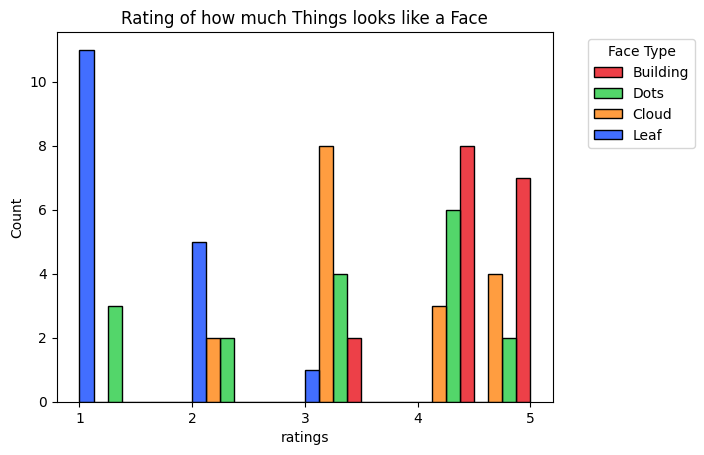

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the histogram with KDE, dodge instead of stacking
df_melted = df_rate_face.drop(columns = ['rank_art_to_logic']).melt().rename(columns={'value':'ratings','variable':'rate_face_type'})
sns.histplot(data=df_melted, x='ratings', hue='rate_face_type', stat='count', multiple="dodge", palette="bright")

# Set the x-ticks to be integers
plt.xticks(np.arange(df_melted['ratings'].min(), df_melted['ratings'].max() + 1, 1))
custom_labels = ['Building', 'Dots', 'Cloud', 'Leaf']  # Replace with your desired labels
plt.legend(title="Face Type", labels=custom_labels, loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title('Rating of how much Things looks like a Face')


# Show the plot
plt.show()


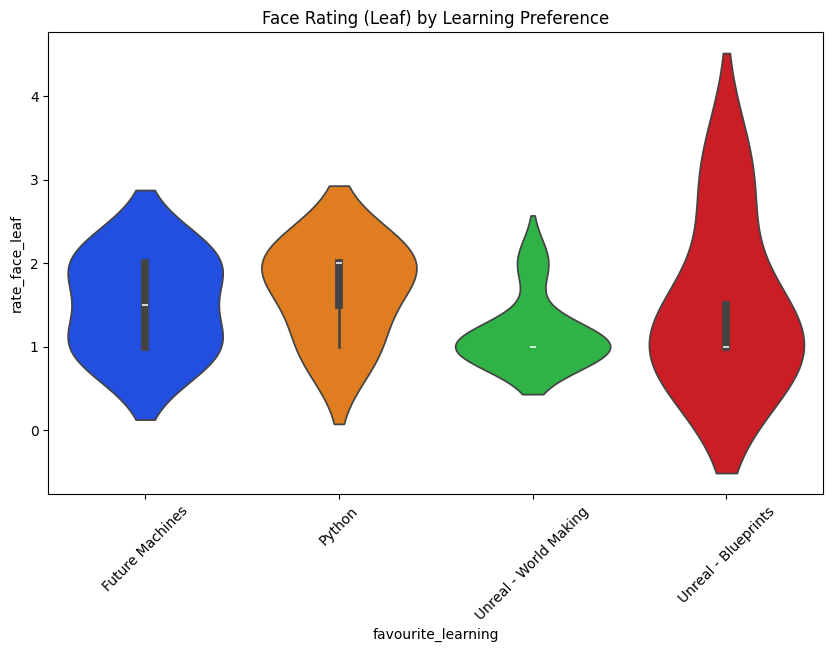

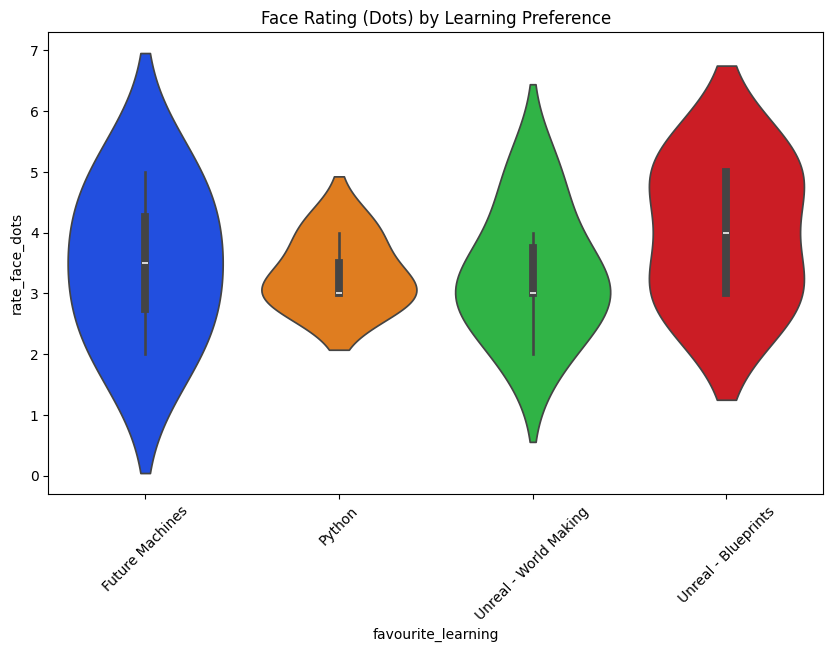

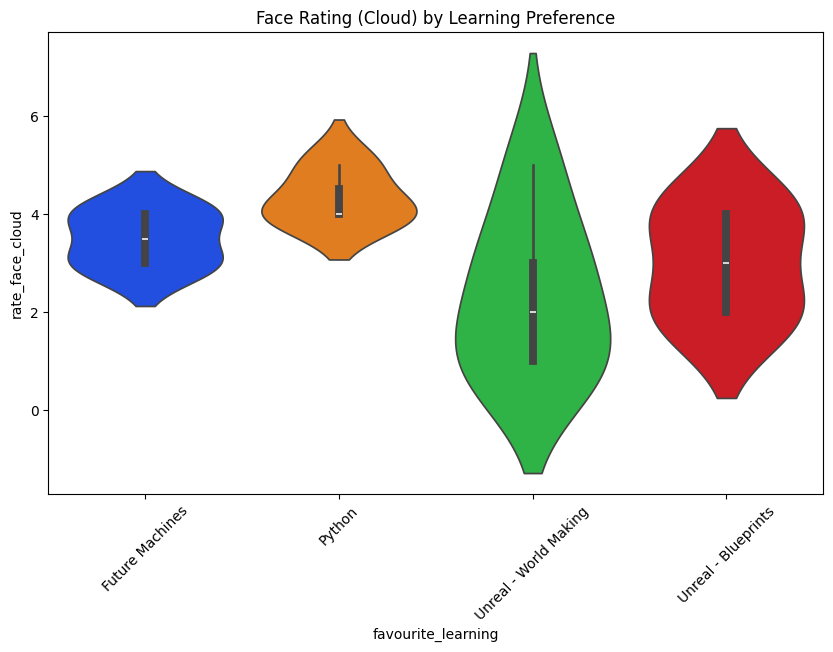

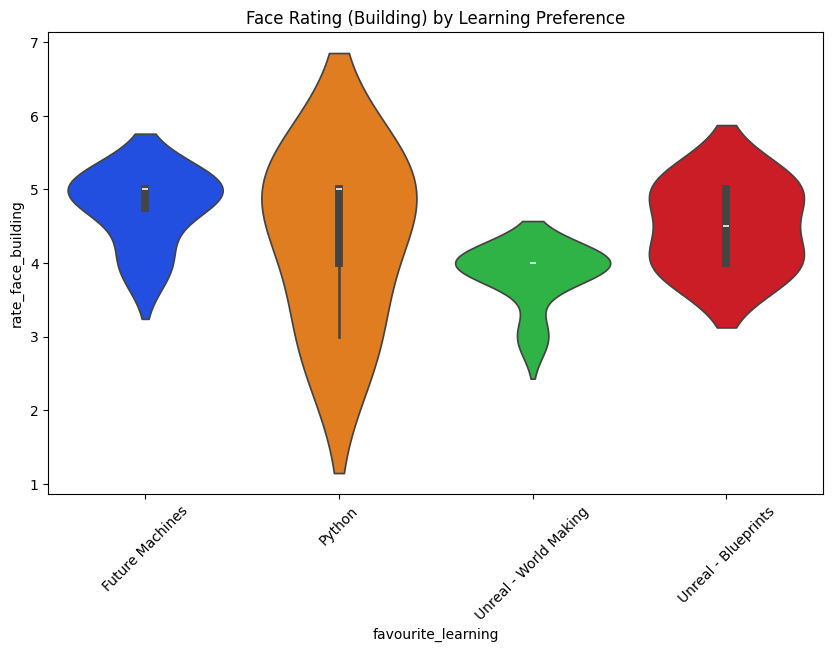

In [26]:
# More 'artistic' people are more likely to recognise other things as faces


import matplotlib.pyplot as plt
import seaborn as sns

face_columns =['rate_face_leaf','rate_face_dots','rate_face_cloud','rate_face_building']
thing_name = ['Leaf','Dots','Cloud','Building']

for i,column in enumerate(face_columns):

    # Create a boxplot for each face rating and learning preference
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='favourite_learning', y=column, data=data,palette='bright',hue='favourite_learning')
    plt.title(f'Face Rating ({thing_name[i]}) by Learning Preference')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
    plt.show()


In [35]:
df_colours_apart.reset_index()

,favourite_learning,different_colours,count
0,Unreal - World Making,Yes,4
1,Unreal - Blueprints,No,3
2,Future Machines,No,2
3,Python,Yes,2
4,Unreal - World Making,No,2
5,Future Machines,Yes,1
6,Python,No,1
7,Unreal - Blueprints,Yes,1


In [34]:
df[['favourite_learning','different_colours']].value_counts()

favourite_learning     different_colours
Unreal - World Making  Yes                  4
Unreal - Blueprints    No                   3
Future Machines        No                   2
Python                 Yes                  2
Unreal - World Making  No                   2
Future Machines        Yes                  1
Python                 No                   1
Unreal - Blueprints    Yes                  1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of People who can tell 2 Colours Apart and their Favourite Subject\n')

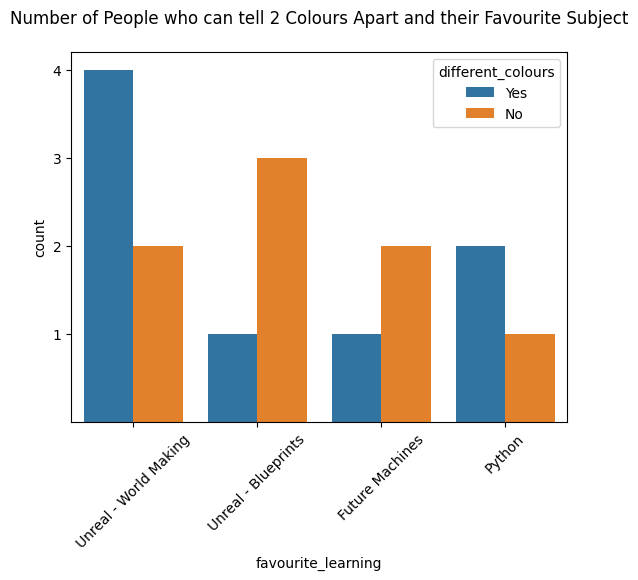

In [45]:
#  More 'artistic' people are more likely to be able to tell 2 colours apart
import math

df_colours_apart = pd.DataFrame(df[['favourite_learning','different_colours']].value_counts().reset_index())
y= df_colours_apart['count']
yint = range(min(y), math.ceil(max(y))+1)
sns.barplot(df_colours_apart,x='favourite_learning',y='count',hue ='different_colours')

plt.xticks(rotation=45)
plt.yticks(yint)
plt.title('Number of People who can tell 2 Colours Apart and their Favourite Subject\n')



In [ ]:
# Favourite colours ? idk

In [ ]:
# how bad are people at riddles

In [ ]:
# Bananas